In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

2024-06-01 09:25:25.726642: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 09:25:25.726746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 09:25:25.830099: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df_train = pd.read_csv('/kaggle/input/vcb-2009-2019/vcb_2009_2018.csv')
df_train.head()

,DATE,CLOSE,TICKER,OPEN,HIGH,LOW,VOLUME,HELPER
0,30/06/2009,60.0,VCB,60.0,60.0,60.0,294070,2374
1,1/7/09,60.5,VCB,63.0,63.0,59.5,6248390,2373
2,2/7/09,58.0,VCB,59.5,60.0,57.5,1515670,2372
3,3/7/09,56.0,VCB,56.5,57.0,56.0,899720,2371
4,6/7/09,58.5,VCB,56.0,58.5,56.0,1571740,2370


In [3]:
df_train_set = df_train.iloc[:, 1:2].values

In [4]:
df_train_set[0:5]

array([[60. ],
       [60.5],
       [58. ],
       [56. ],
       [58.5]])

In [5]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
df_train_scale = sc.fit_transform(df_train_set)

In [6]:
df_train_scale[:5]

array([[0.73417722],
       [0.74321881],
       [0.69801085],
       [0.66184448],
       [0.70705244]])

In [7]:
df_train_scale[61-60:61,0]

array([0.74321881, 0.69801085, 0.66184448, 0.70705244, 0.67088608,
       0.65280289, 0.62567812, 0.58047016, 0.53526221, 0.51356239,
       0.53526221, 0.54972875, 0.53707052, 0.4954792 , 0.49728752,
       0.50813743, 0.54972875, 0.58951175, 0.63471971, 0.60759494,
       0.59855335, 0.58047016, 0.62567812, 0.67088608, 0.70705244,
       0.69801085, 0.67992767, 0.67088608, 0.68896926, 0.67992767,
       0.67088608, 0.67992767, 0.67992767, 0.66184448, 0.65280289,
       0.65280289, 0.65280289, 0.66184448, 0.67088608, 0.65280289,
       0.66184448, 0.66184448, 0.67088608, 0.68896926, 0.67992767,
       0.66184448, 0.63471971, 0.60759494, 0.61663653, 0.61663653,
       0.60759494, 0.60759494, 0.60759494, 0.59855335, 0.6437613 ,
       0.66184448, 0.67088608, 0.6437613 , 0.62567812, 0.63471971])

In [8]:
df_train_scale[60,0]

0.6347197106690777

In [9]:
X_train = []
y_train = []
no_of_sample = len(df_train_set)

for i in range(60, no_of_sample):
    X_train.append(df_train_scale[i-60:i,0])
    y_train.append(df_train_scale[i,0])
    

In [10]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape

(2314, 60)

In [12]:
y_train.shape

(2314,)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [14]:
X_train.shape

(2314, 60, 1)

In [15]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer= 'adam',
              loss= 'mean_squared_error')

In [17]:
epochs = 100
batch_size = 32
history = model.fit(X_train, 
                    y_train, 
                    epochs = epochs,
                    batch_size = batch_size)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0258
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0042
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0039
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0033
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0027
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0030
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0024
Epoch 9/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0026
Epoch 10/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023
Epoch 11/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0023
Epoch 12/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019
Epoch 13/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0025
Epoch 14/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019
Epoch 15/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - lo

In [18]:
df_test = pd.read_csv('/kaggle/input/vcb-2009-2019/vcb_2019.csv')
read_stock_price = df_test.iloc[:, 1:2].values

In [19]:
df_total = pd.concat((df_train['CLOSE'],df_test['CLOSE']),axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [20]:
X_test = []
no_of_sample = len(inputs)

for i in range(60, no_of_sample):
    X_test.append(inputs[i-60:i,0])
    

In [21]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [22]:
prediced_stock_price = model.predict(X_test)
prediced_stock_price = sc.inverse_transform(prediced_stock_price)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


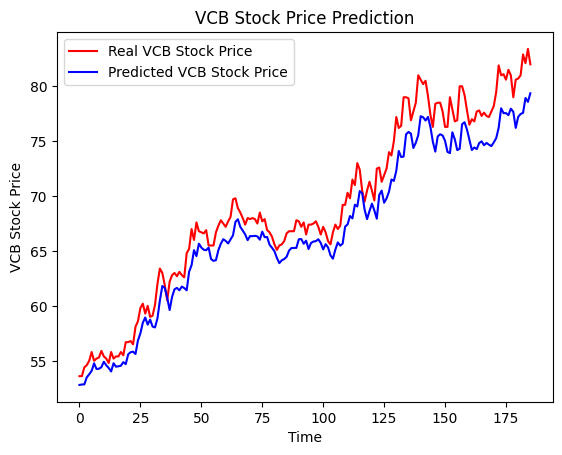

In [23]:
plt.plot(read_stock_price, c = 'r', label = 'Real VCB Stock Price')
plt.plot(prediced_stock_price, c = 'b', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()

In [24]:
df_test = df_test['CLOSE'][len(df_test)-60:len(df_test)].to_numpy()
df_test = np.array(df_test)

inputs = df_test
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Stock price 3/10/2019 of VCB :  78.61189


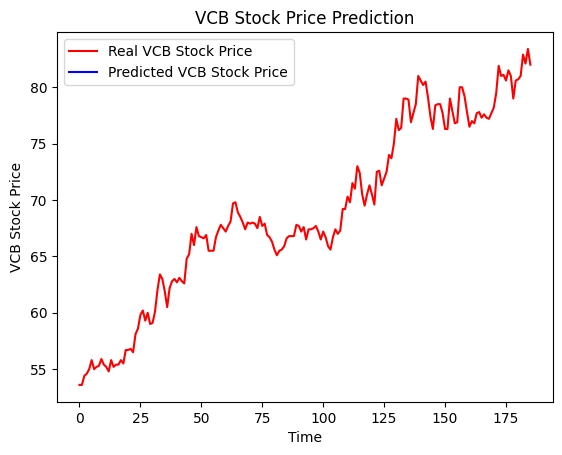

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 4/10/2019 of VCB :  76.12712


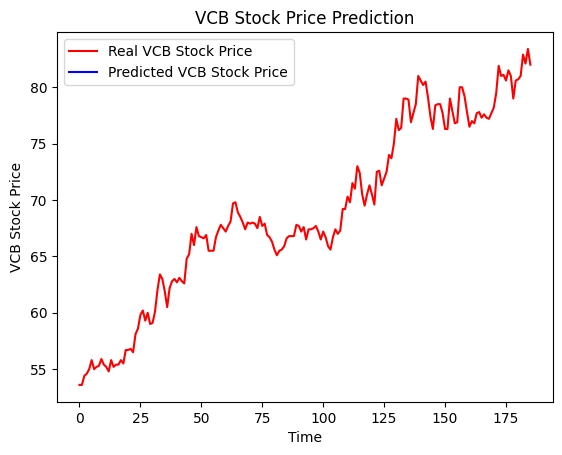

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 5/10/2019 of VCB :  74.1638


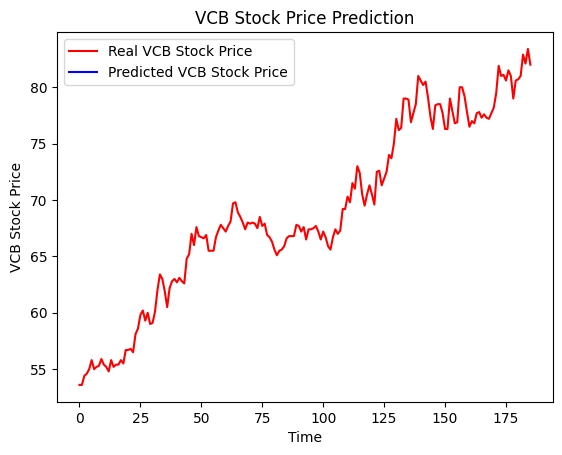

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 6/10/2019 of VCB :  72.576675


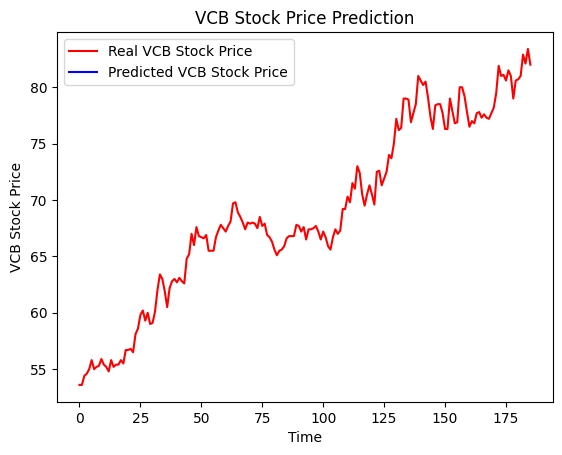

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 7/10/2019 of VCB :  71.123634


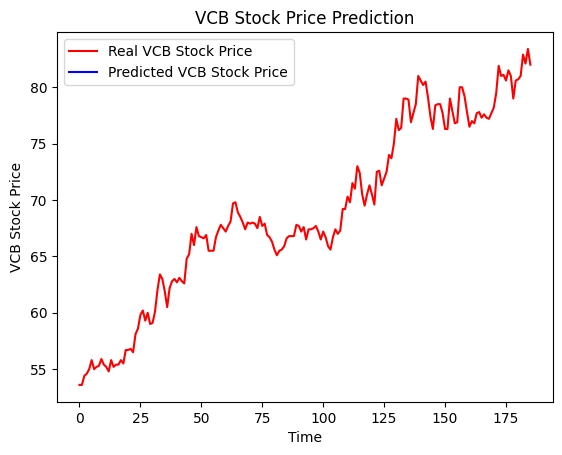

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 8/10/2019 of VCB :  69.781494


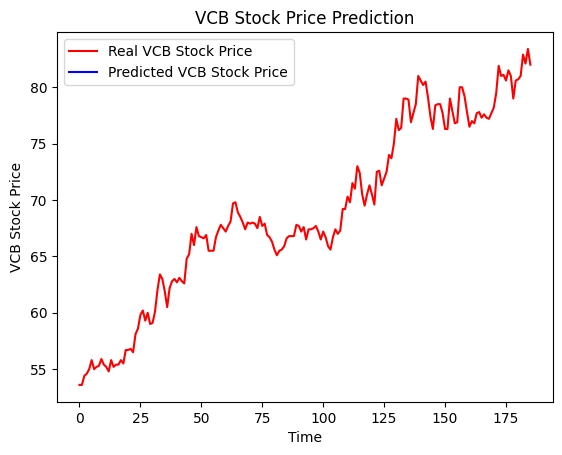

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 9/10/2019 of VCB :  68.56855


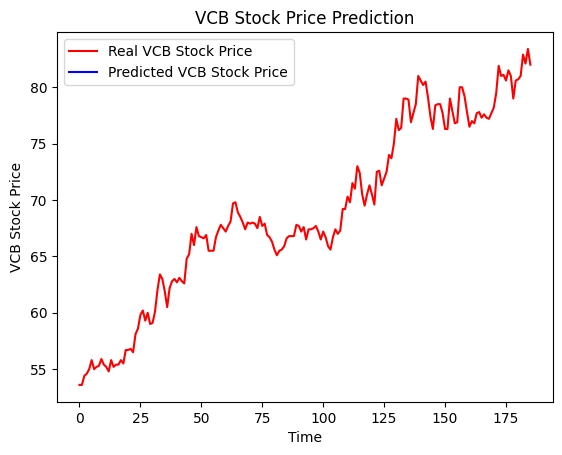

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 10/10/2019 of VCB :  67.474106


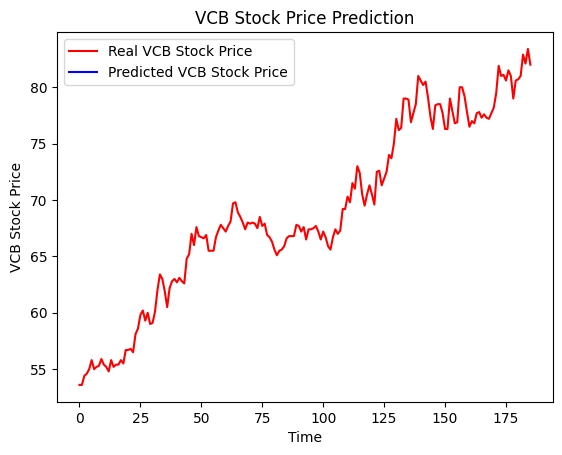

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Stock price 11/10/2019 of VCB :  66.470184


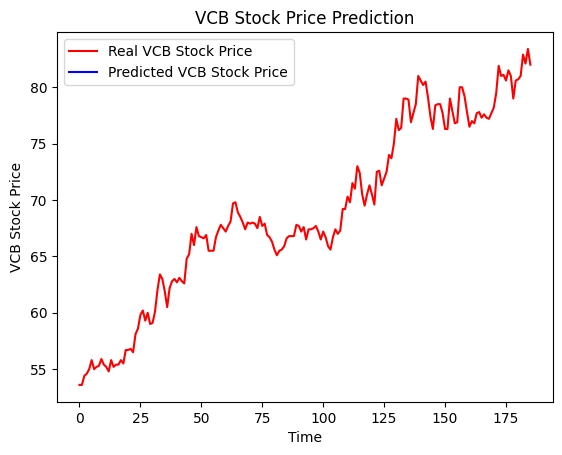

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 12/10/2019 of VCB :  65.52922


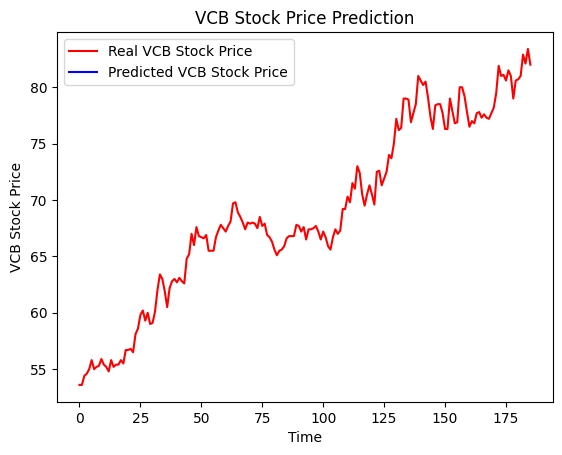

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 13/10/2019 of VCB :  64.630936


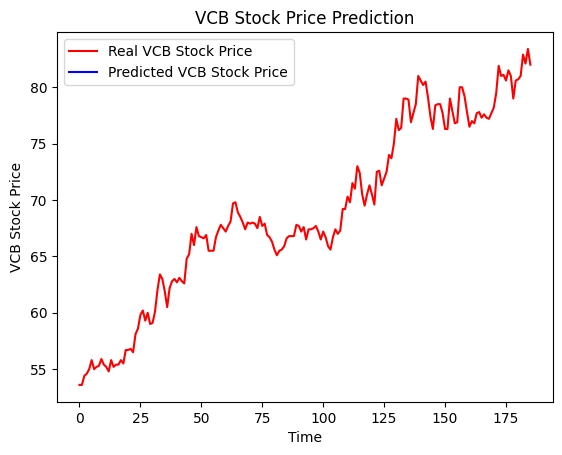

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 14/10/2019 of VCB :  63.76305


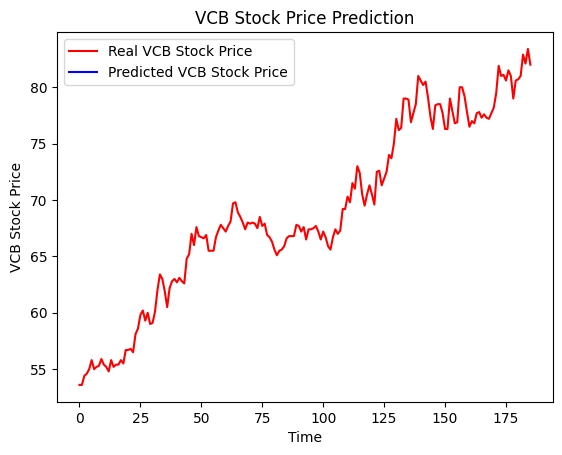

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 15/10/2019 of VCB :  62.91973


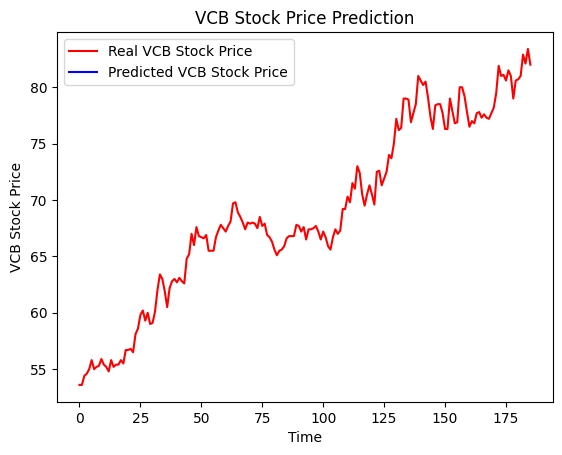

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 16/10/2019 of VCB :  62.09955


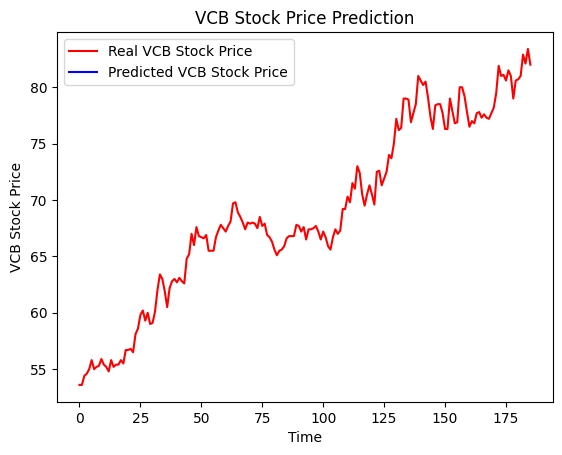

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 17/10/2019 of VCB :  61.303413


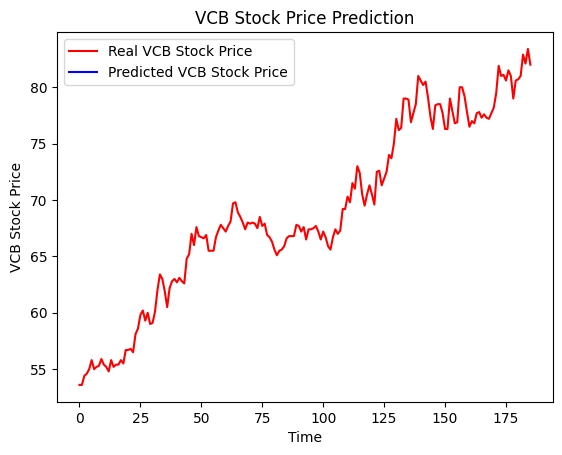

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Stock price 18/10/2019 of VCB :  60.5329


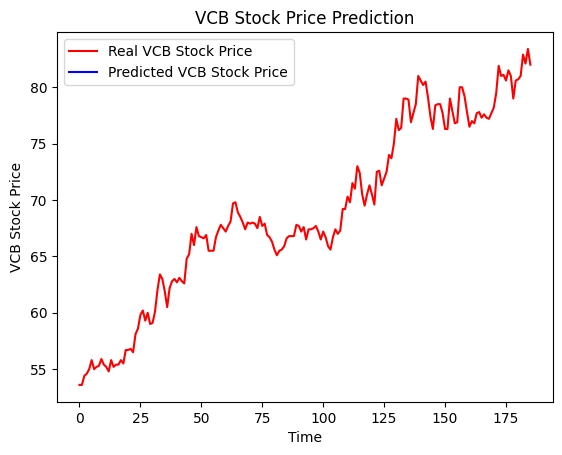

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 19/10/2019 of VCB :  59.78922


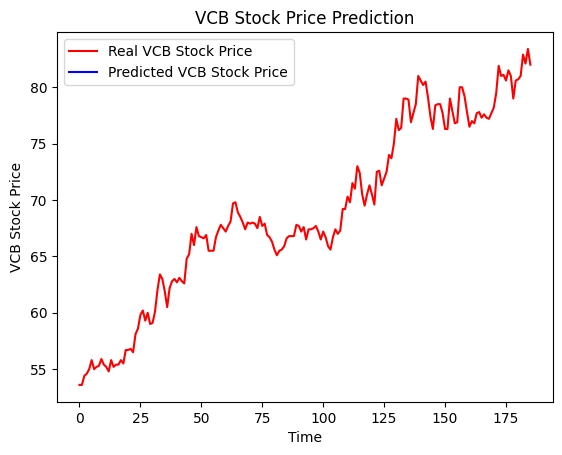

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 20/10/2019 of VCB :  59.07264


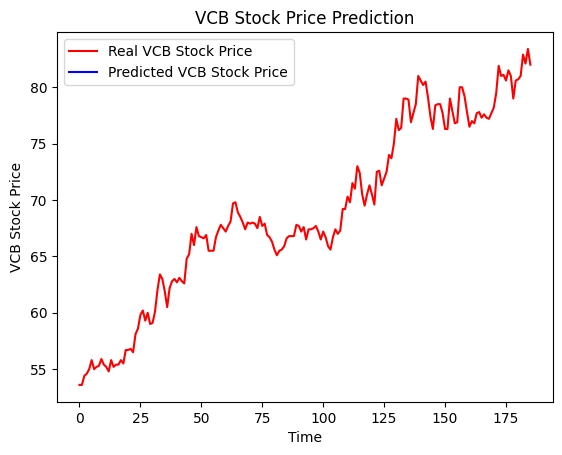

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 21/10/2019 of VCB :  58.382442


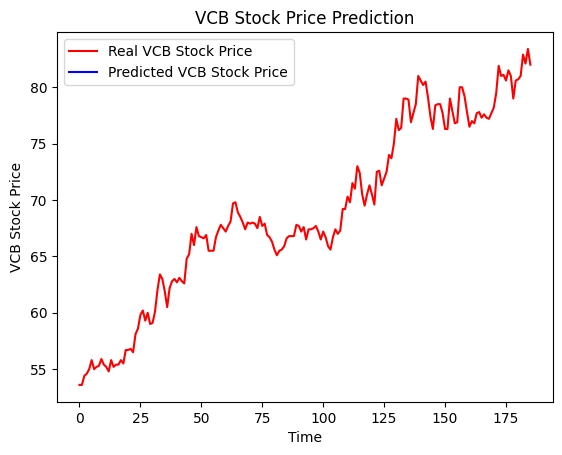

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 22/10/2019 of VCB :  57.71711


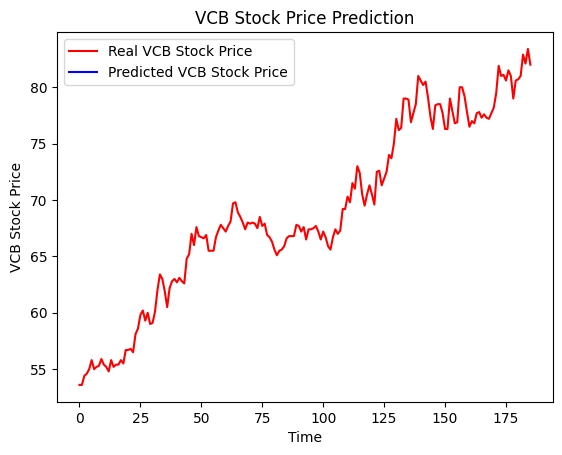

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 23/10/2019 of VCB :  57.074654


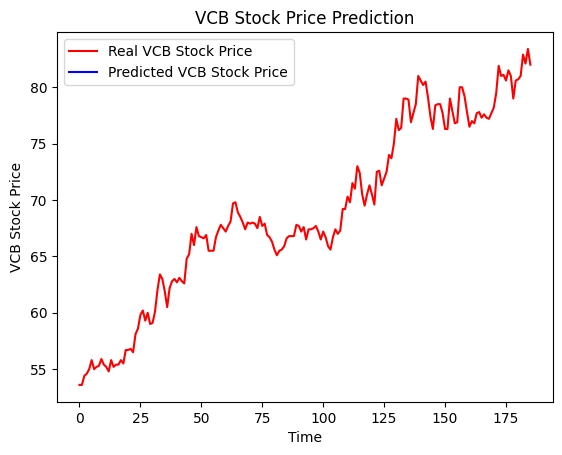

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 24/10/2019 of VCB :  56.45291


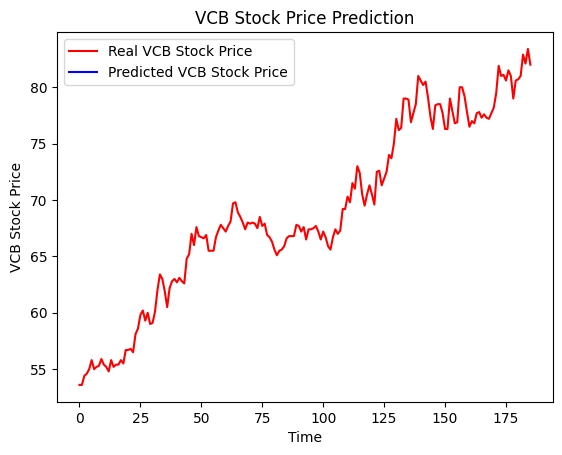

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 25/10/2019 of VCB :  55.849827


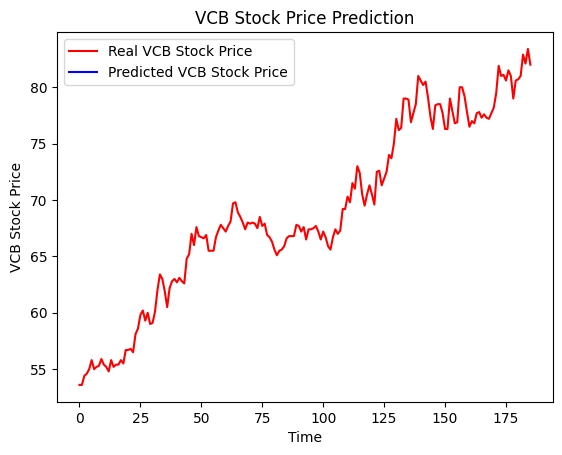

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 26/10/2019 of VCB :  55.263577


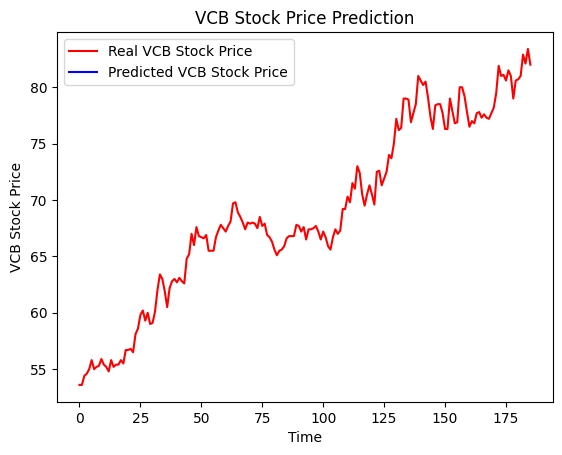

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Stock price 27/10/2019 of VCB :  54.692642


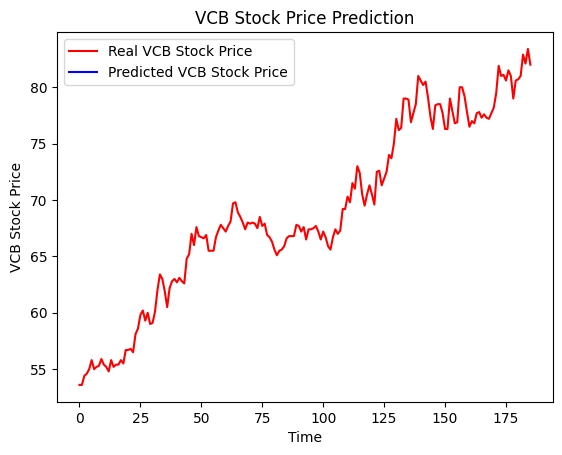

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 28/10/2019 of VCB :  54.135803


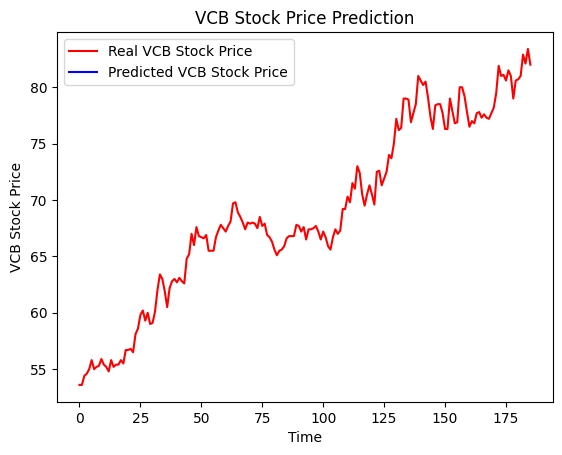

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Stock price 29/10/2019 of VCB :  53.592102


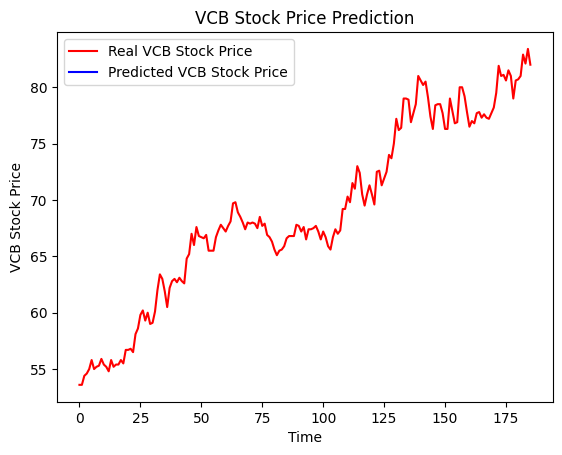

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Stock price 30/10/2019 of VCB :  53.06077


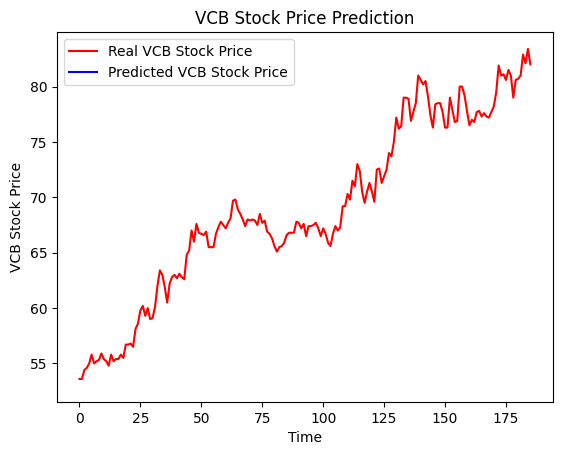

In [25]:
i = 0
while i<28:
    X_test = []
    no_of_sample = len(df_test)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample - 60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = model.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    # Them ngay hien tai vao
    df_test = np.append(df_test, predicted_stock_price[0], axis=0)
    inputs = df_test
    inputs = inputs.reshape(-1, 1)
    inputs = sc.transform(inputs)

    print('Stock price ' + str(i+3) + '/10/2019 of VCB : ', predicted_stock_price[0][0])
    i = i +1

    plt.plot(read_stock_price, c = 'r', label = 'Real VCB Stock Price')
    plt.plot(predicted_stock_price, c = 'b', label = 'Predicted VCB Stock Price')
    plt.title('VCB Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('VCB Stock Price')
    plt.legend()
    plt.show()